In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import glob
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install syllables
!pip install textstat
!pip install langdetect
import syllables
import textstat
import re

     |████████████████████████████████| 102kB 5.4MB/s 
     |████████████████████████████████| 1.9MB 9.3MB/s 
     |████████████████████████████████| 983kB 12.2MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=a5ddba4c762458cf4bebebd6a047fda870eb38a677406621085b35965b250589
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
# Load the dataset
df_main = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/2.General Dataset (Initial)/General Dataset Cleaned 1.csv')
df_nlp = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/2.General Dataset (Initial)/Project Description for NLP.csv')
print("Main Dataframe Shape: ", df_main.shape)
print("NLP Dataframe Shape: ", df_nlp.shape)

Main Dataframe Shape:  (185129, 32)
NLP Dataframe Shape:  (185129, 3)


In [ ]:
# Create a function to count words
def count_words(description_words):
  try:
    return len(description_words)
  except:
    return 0

In [ ]:
# Create a function to count sentences
def count_sentences(description):
  try:
    return textstat.sentence_count(description)
  except:
    return 0

In [ ]:
# Create a function to count characters
def count_characters(description):
  try:
    return len(description) - description.count(" ")
  except:
    return 0

In [ ]:
# Create a function to count unique words
def count_unique_words(description_words):
  unique_words = set()
  try:
    for i in range(len(description_words)):
      description_words[i] = description_words[i].lower()
      description_words[i] = description_words[i].strip()

    for i in range(len(description_words)):
      if description_words[i] not in unique_words:
        unique_words.add(description_words[i])

    return unique_words
  except:
    return []

In [ ]:
# Create a function to count long words
def count_long_words(description_words, no_of_words, no_of_characters):
  try:
    average_word_length = no_of_characters / no_of_words
    no_of_long_words = 0
    for i in range(len(description_words)):
      description_words[i] = description_words[i].strip()
      description_words[i] = description_words[i].lower()
      if description_words[i].isalpha():
        if len(description_words[i]) > average_word_length:
          no_of_long_words += 1
    return no_of_long_words
  except:
    return -1

In [ ]:
# Calculating the above mentioned parameters for entire data
n_words = []
n_sentences = []
n_characters = []
n_unique_words = []
n_syllables = []
n_monosyllables = []
n_polysyllables = []
n_long_words = []

word_error = []
sentence_error = []
character_error = []
unique_word_error = []
syllable_error = []
long_word_error = []

for i in range(len(df_nlp)):
  print("Project: ", i)

  description = df_nlp.iloc[i][0]

  # Number of Words
  try:
    description_words = re.findall("[a-zA-Z.'@]+", description)
  except:
     description_words = []
  no_of_words = count_words(description_words)
  if no_of_words == 0:
    word_error.append(i)
  n_words.append(no_of_words)
  print("Number of Words: ", no_of_words)

  # Number of Sentences
  no_of_sentences = count_sentences(description)
  if no_of_sentences == 0:
    sentence_error.append(i)
  n_sentences.append(no_of_sentences)
  print("Number of Sentences: ", no_of_sentences)

  # Number of Characters
  no_of_characters = count_characters(description)
  if no_of_characters == 0:
    character_error.append(i)
  n_characters.append(no_of_characters)
  print("Number of Characters: ", no_of_characters)

  # Number of Unique Words
  unique_words = count_unique_words(description_words)
  if len(unique_words) == 0:
    unique_word_error.append(i)
  n_unique_words.append(len(unique_words))
  print("Number of Unique Words: ", len(unique_words))

  # Number of Syllables, Monosyllables, Polysyllables
  no_of_syllables = 0
  no_of_monosyllables = 0
  no_of_polysyllables = 0
  for i in range(len(description_words)):
    description_words[i] = description_words[i].strip()

    try:
      no_of_syllables += syllables.estimate(description_words[i])
      if(syllables.estimate(description_words[i])==1):
        no_of_monosyllables += 1
      elif(syllables.estimate(description_words[i])>=2):
        no_of_polysyllables += 1
    except:
      syllable_error.append(i)
      no_of_syllables = 0
      no_of_monosyllables = 0
      no_of_polysyllables = 0
      continue

  n_syllables.append(no_of_syllables)
  n_monosyllables.append(no_of_monosyllables)
  n_polysyllables.append(no_of_polysyllables)
  print("Number of Syllables: ", no_of_syllables)
  print("Number of Monosyllables: ", no_of_monosyllables)
  print("Number of Polysyllables: ", no_of_polysyllables)

  # Number of Long Words
  no_of_long_words = count_long_words(description_words, no_of_words, no_of_characters)
  if no_of_long_words == -1:
    long_word_error.append(i)
    no_of_long_words = 0
  n_long_words.append(no_of_long_words)
  print("Number of Long Words: ", no_of_long_words)

Streaming output truncated to the last 5000 lines.
Number of Unique Words:  17
Number of Syllables:  34
Number of Monosyllables:  6
Number of Polysyllables:  12
Number of Long Words:  7
Project:  184574
Number of Words:  13
Number of Sentences:  1
Number of Characters:  84
Number of Unique Words:  12
Number of Syllables:  29
Number of Monosyllables:  4
Number of Polysyllables:  9
Number of Long Words:  7
Project:  184575
Number of Words:  23
Number of Sentences:  1
Number of Characters:  114
Number of Unique Words:  22
Number of Syllables:  40
Number of Monosyllables:  13
Number of Polysyllables:  10
Number of Long Words:  11
Project:  184576
Number of Words:  13
Number of Sentences:  1
Number of Characters:  58
Number of Unique Words:  11
Number of Syllables:  19
Number of Monosyllables:  7
Number of Polysyllables:  6
Number of Long Words:  6
Project:  184577
Number of Words:  20
Number of Sentences:  1
Number of Characters:  113
Number of Unique Words:  19
Number of Syllables:  41
Nu

In [ ]:
# Identifying Errors
print("Shape: ", df_nlp.shape)
print("Words: ", len(n_words))
print("Sentences: ", len(n_sentences))
print("Characters: ", len(n_characters))
print("Unique Words: ", len(n_unique_words))
print("Syllables: ", len(n_syllables))
print("Monosyllables: ", len(n_monosyllables))
print("Polysyllables: ", len(n_polysyllables))
print("Long Words: ", len(n_long_words))
print("Word Error", len(word_error), word_error)
print("Sentence Error", len(sentence_error), sentence_error)
print("Character Error", len(character_error), character_error)
print("Unique Word Error", len(unique_word_error), unique_word_error)
print("Syllable Error", len(syllable_error), syllable_error)
print("Long Word Error", len(long_word_error), long_word_error)

Shape:  (185129, 3)
Words:  185129
Sentences:  185129
Characters:  185129
Unique Words:  185129
Syllables:  185129
Monosyllables:  185129
Polysyllables:  185129
Long Words:  185129
Word Error 0 []
Sentence Error 0 []
Character Error 0 []
Unique Word Error 0 []
Syllable Error 0 []
Long Word Error 0 []


In [ ]:
# Adding new columns in the dataframe
df_nlp['n_words'] = n_words
df_nlp['n_sentences'] = n_sentences
df_nlp['n_characters'] = n_characters
df_nlp['n_unique_words'] = n_unique_words
df_nlp['n_long_words'] = n_long_words
df_nlp['n_syllables'] = n_syllables
df_nlp['n_monosyllables'] = n_monosyllables
df_nlp['n_polysyllables'] = n_polysyllables
df_nlp.head()

,blurb,state,parent_category,n_words,n_sentences,n_characters,n_unique_words,n_long_words,n_syllables,n_monosyllables,n_polysyllables
0,A film about chance meetings and changed lives.,1,Film & Video,8,1,40,8,3,13,3,5
1,Milestone Broadcast is producing www.peaceday...,1,Film & Video,15,1,115,15,3,32,5,10
2,Teaching kids computer science and robotics th...,1,Technology,16,1,91,14,9,27,9,7
3,Share everything in life's journey with your p...,1,Design,19,2,108,17,8,38,7,12
4,This book is dedicated to your inner child. It...,1,Publishing,20,2,95,18,7,31,13,7


In [ ]:
# Convert Dataframe to CSV File
df_nlp.to_csv("NLP Metric Evaluation 1.csv", index=False)

In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/5.NLP Metric Evaluation of General Dataset/Model/NLP Metric Evaluation 1.csv')
df.head()

In [ ]:
# Create a function to calculate Flesh Kincaid Reading Ease
def calculate_flesh_kincaid_reading_ease(i, description):
  try:
    return textstat.flesch_reading_ease(description)
  except Exception as e:
    print(e)
    print(1, i, description)
    return -1

In [ ]:
# Create a function to calculate Flesh Kincaid Grade Level
def calculate_flesh_kincaid_grade_level(i, description):
  try:
    return textstat.flesch_kincaid_grade(description)
  except Exception as e:
    print(e)
    print(2, i, description)
    return -1

In [ ]:
# Create a function to calculate Gunning Fox Index
def calculate_gunning_fog_index(i, description):
  try:
    return textstat.gunning_fog(description)
  except Exception as e:
    print(e)
    print(3, i, description)
    return -1

In [ ]:
# Create a function to calculate Coleman Liau Index
def calculate_coleman_liau_index(i, description):
  try:
    return textstat.coleman_liau_index(description)
  except Exception as e:
    print(e)
    print(4, i, description)
    return -1

In [ ]:
# Create a function to calculate Automated Readability Index
def calculate_automated_readability_index(i, description):
  try:
    return textstat.automated_readability_index(description)
  except Exception as e:
    print(e)
    print(5, i, description)
    return -1

In [ ]:
# Create a function to calculate Linsear Write Index
def calculate_linsear_write_index(i, description):
  try:
    return textstat.linsear_write_formula(description)
  except Exception as e:
    print(e)
    print(6, i, description)
    return -1

In [ ]:
# Create a function to calculate Dale Chall Readability Index
def calculate_dale_chall_readability_index(i, description):
  try:
    return textstat.dale_chall_readability_score(description)
  except Exception as e:
    print(e)
    print(7, i, description)
    return -1

In [ ]:
# Create a function to calculate Readability Consensus
def calculate_readability_consensus(i, description):
  try:
    return textstat.text_standard(description)
  except Exception as e:
    print(e)
    print(8, i, description)
    return ""

In [ ]:
# Calculating the above mentioned metrics for entire data
n_flesh_kincaid_reading_ease = []
n_flesh_kincaid_grade_level = []
n_gunning_fog_index = []
n_coleman_liau_index = []
n_automated_readability_index = []
n_linsear_write_index = []
n_dale_chall_readability_index = []
n_readability_consensus = []

flesh_kincaid_reading_ease_error = []
flesh_kincaid_grade_level_error = []
gunning_fox_index_error = []
coleman_liau_index_error = []
automated_readability_index_error = []
linsear_write_index_error = []
dale_chall_readability_index_error = []
readability_consensus_error = []

for i in range(len(df_nlp)):
  description = df_nlp.loc[i, 'blurb']
  print(i)

  # Flesh Kincaid Reading Ease
  flesh_kincaid_reading_ease = calculate_flesh_kincaid_reading_ease(i, description)
  if flesh_kincaid_reading_ease > 100:
    flesh_kincaid_reading_ease = 100
  elif flesh_kincaid_reading_ease < 0:
    flesh_kincaid_reading_ease = 0
    flesh_kincaid_reading_ease_error.append(i)
  n_flesh_kincaid_reading_ease.append(flesh_kincaid_reading_ease)

  # Flesh Kincaid Grade Level
  flesh_kincaid_grade_level = calculate_flesh_kincaid_grade_level(i, description)
  if flesh_kincaid_grade_level < 0:
    flesh_kincaid_grade_level = 0
    flesh_kincaid_grade_level_error.append(i)
  n_flesh_kincaid_grade_level.append(flesh_kincaid_grade_level)

  # Gunning Fog Index
  gunning_fog_index = calculate_gunning_fog_index(i, description)
  if gunning_fog_index < 0:
    gunning_fog_index = 0
    gunning_fox_index_error.append(i)
  if gunning_fog_index > 20:
    gunning_fog_index = 20
    gunning_fox_index_error.append(i)
  n_gunning_fog_index.append(gunning_fog_index)

  # Coleman Liau Index
  coleman_liau_index = calculate_coleman_liau_index(i, description)
  if coleman_liau_index < 0:
    coleman_liau_index = 0
    coleman_liau_index_error.append(i)
  if coleman_liau_index > 23:
    coleman_liau_index = 23
    coleman_liau_index_error.append(i)
  n_coleman_liau_index.append(coleman_liau_index)

  # Automated Readability Index
  automated_readability_index = calculate_automated_readability_index(i, description)
  if automated_readability_index < 0:
    automated_readability_index = 0
    automated_readability_index_error.append(i)
  if automated_readability_index > 25:
    automated_readability_index = 25
    automated_readability_index_error.append(i)
  n_automated_readability_index.append(automated_readability_index)

  # Linsear Write Index
  linsear_write_index = calculate_linsear_write_index(i, description)
  if linsear_write_index < 0:
    linsear_write_index = 0
    linsear_write_index_error.append(i)
  n_linsear_write_index.append(linsear_write_index)

  # Dale Chall Readability Index
  dale_chall_readability_index = calculate_dale_chall_readability_index(i, description)
  if dale_chall_readability_index < 0:
    dale_chall_readability_index = 0
    dale_chall_readability_index_error.append(i)
  n_dale_chall_readability_index.append(dale_chall_readability_index)

  # Readability Consensus
  readability_consensus = calculate_readability_consensus(i, description)
  if readability_consensus == "":
    readability_consensus = None
    readability_consensus_error.append(i)
  n_readability_consensus.append(readability_consensus)

Streaming output truncated to the last 5000 lines.
180129
180130
180131
180132
180133
180134
180135
180136
180137
180138
180139
180140
180141
180142
180143
180144
180145
180146
180147
180148
180149
180150
180151
180152
180153
180154
180155
180156
180157
180158
180159
180160
180161
180162
180163
180164
180165
180166
180167
180168
180169
180170
180171
180172
180173
180174
180175
180176
180177
180178
180179
180180
180181
180182
180183
180184
180185
180186
180187
180188
180189
180190
180191
180192
180193
180194
180195
180196
180197
180198
180199
180200
180201
180202
180203
180204
180205
180206
180207
180208
180209
180210
180211
180212
180213
180214
180215
180216
180217
180218
180219
180220
180221
180222
180223
180224
180225
180226
180227
180228
180229
180230
180231
180232
180233
180234
180235
180236
180237
180238
180239
180240
180241
180242
180243
180244
180245
180246
180247
180248
180249
180250
180251
180252
180253
180254
180255
180256
180257
180258
180259
180260
180261
180262
180263
1802

In [ ]:
# Identifying Errors
print("Flesh Kincaid Reading Ease Error", len(flesh_kincaid_reading_ease_error), flesh_kincaid_reading_ease_error)
print("Flesh Kincaid Grade Level Error", len(flesh_kincaid_grade_level_error), flesh_kincaid_grade_level_error)
print("Gunning Fog Index Error", len(gunning_fox_index_error), gunning_fox_index_error)
print("Coleman Liau Index Error", len(coleman_liau_index_error), coleman_liau_index_error)
print("Automated Readability Index Error", len(automated_readability_index_error), automated_readability_index_error)
print("Linsear Write Index Error", len(linsear_write_index_error), linsear_write_index_error)
print("Dale Chall Readability Index Error", len(dale_chall_readability_index_error), dale_chall_readability_index_error)
print("Readability Consensus Error", len(readability_consensus_error), readability_consensus_error)

Flesh Kincaid Reading Ease Error 2370 [35, 38, 61, 87, 193, 324, 352, 441, 583, 592, 702, 757, 791, 810, 828, 899, 1051, 1092, 1095, 1124, 1173, 1223, 1245, 1330, 1382, 1393, 1429, 1532, 1730, 1758, 1785, 2053, 2066, 2125, 2133, 2233, 2438, 2490, 2568, 2578, 2625, 2671, 2770, 2841, 3040, 3055, 3198, 3232, 3246, 3365, 3386, 3452, 3588, 3673, 4075, 4350, 4371, 4712, 4732, 4895, 4921, 4930, 4933, 5046, 5090, 5177, 5185, 5233, 5247, 5351, 5382, 5385, 5471, 5564, 5702, 5835, 5937, 6308, 6331, 6339, 6373, 6552, 6812, 6838, 6894, 6896, 7014, 7108, 7109, 7160, 7163, 7226, 7355, 7455, 7707, 7743, 7831, 7924, 8019, 8068, 8180, 8202, 8228, 8257, 8278, 8329, 8381, 8553, 8597, 8623, 8627, 8638, 8739, 8924, 9169, 9388, 9432, 9468, 9534, 9536, 9590, 9632, 9650, 9726, 9797, 9852, 9861, 9886, 9905, 9973, 10035, 10039, 10077, 10228, 10815, 10885, 10985, 11106, 11363, 11371, 11384, 11394, 11492, 11544, 11673, 11771, 11791, 11836, 12070, 12184, 12394, 12534, 12538, 12541, 12603, 12653, 12677, 12734, 12785

In [ ]:
# Adding new columns in the dataframe
df_nlp['n_flesh_kincaid_reading_ease'] = n_flesh_kincaid_reading_ease
df_nlp['n_flesh_kincaid_grade_level'] = n_flesh_kincaid_grade_level
df_nlp['n_gunning_fog_index'] = n_gunning_fog_index
df_nlp['n_coleman_liau_index'] = n_coleman_liau_index
df_nlp['n_automated_readability_index'] = n_automated_readability_index
df_nlp['n_linsear_write_index'] = n_linsear_write_index
df_nlp['n_dale_chall_readability_index'] = n_dale_chall_readability_index
df_nlp['n_readability_consensus'] = n_readability_consensus
df_nlp.head()

,blurb,state,parent_category,n_words,n_sentences,n_characters,n_unique_words,n_long_words,n_syllables,n_monosyllables,n_polysyllables,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus
0,A film about chance meetings and changed lives.,1,Film & Video,8,1,40,8,3,13,3,5,100.00,0.5,3.20,8.66,6.1,3.00,6.01,2nd and 3rd grade
1,Milestone Broadcast is producing www.peaceday...,1,Film & Video,15,1,115,15,3,32,5,10,43.73,11.9,11.81,14.45,16.6,12.00,8.73,11th and 12th grade
2,Teaching kids computer science and robotics th...,1,Technology,16,1,91,14,9,27,9,7,55.24,9.5,11.40,15.08,13.4,12.00,8.38,9th and 10th grade
3,Share everything in life's journey with your p...,1,Design,19,2,108,17,8,38,7,12,53.37,8.2,10.12,13.02,10.1,6.25,7.43,9th and 10th grade
4,This book is dedicated to your inner child. It...,1,Publishing,20,2,95,18,7,31,13,7,69.79,6.0,6.00,8.21,5.9,5.00,7.29,5th and 6th grade


In [ ]:
# Resolving Errors
error_set = set()
for i in range(len(flesh_kincaid_reading_ease_error)):
  error_set.add(flesh_kincaid_reading_ease_error[i])
for i in range(len(flesh_kincaid_grade_level_error)):
  error_set.add(flesh_kincaid_grade_level_error[i])
for i in range(len(gunning_fox_index_error)):
  error_set.add(gunning_fox_index_error[i])
for i in range(len(coleman_liau_index_error)):
  error_set.add(coleman_liau_index_error[i])
for i in range(len(automated_readability_index_error)):
  error_set.add(automated_readability_index_error[i])
for i in range(len(linsear_write_index_error)):
  error_set.add(linsear_write_index_error[i])
for i in range(len(dale_chall_readability_index_error)):
  error_set.add(dale_chall_readability_index_error[i])
for i in range(len(readability_consensus_error)):
  error_set.add(readability_consensus_error[i])
error_list = list(error_set)
print("Errors: ", len(error_list))

Errors:  6759


In [ ]:
# Resolving Errors
df_nlp.drop(error_list, inplace=True)
df_main.drop(error_list, inplace=True)
df_nlp = df_nlp.reset_index(drop=True)
df_main = df_main.reset_index(drop=True)
print("Main Dataframe Shape: ", df_main.shape)
print("NLP Dataframe Shape: ", df_nlp.shape)

Main Dataframe Shape:  (178370, 32)
NLP Dataframe Shape:  (178370, 19)


In [ ]:
# Convert Dataframe to CSV File
df_nlp.to_csv("NLP Metric Evaluation 2.csv", index=False)
df_main.to_csv("General Dataset Cleaned 2.csv", index=False)

In [ ]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/5.NLP Metric Evaluation of General Dataset/Model/NLP Metric Evaluation 2.csv')
df.head()

In [ ]:
# Converting Categorical Data of Readability Consensus to Numerical Data
df_new = df_nlp['n_readability_consensus']
df_new.head()

0      2nd and 3rd grade
1    11th and 12th grade
2     9th and 10th grade
3     9th and 10th grade
4      5th and 6th grade
Name: n_readability_consensus, dtype: object

In [ ]:
# Converting Categorical Data of Readability Consensus to Numerical Data
for i in range(len(df_new)):
  value = df_new.loc[i]
  words1 = value.split('and ')
  words2 = words1[1].split(' ')
  final_val = words2[0]
  final_val = final_val[0:-2]
  final_val = int(final_val)
  df_new.loc[i] = final_val
df_new.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


0     3
1    12
2    10
3    10
4     6
Name: n_readability_consensus, dtype: object

In [ ]:
# Add Numerical Column to Dataframe
df_nlp.drop(['n_readability_consensus'], axis=1, inplace=True)
df_nlp['n_readability_consensus'] = df_new
df_nlp.head()

,blurb,state,parent_category,n_words,n_sentences,n_characters,n_unique_words,n_long_words,n_syllables,n_monosyllables,n_polysyllables,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus
0,A film about chance meetings and changed lives.,1,Film & Video,8,1,40,8,3,13,3,5,100.00,0.5,3.20,8.66,6.1,3.00,6.01,3
1,Milestone Broadcast is producing www.peaceday...,1,Film & Video,15,1,115,15,3,32,5,10,43.73,11.9,11.81,14.45,16.6,12.00,8.73,12
2,Teaching kids computer science and robotics th...,1,Technology,16,1,91,14,9,27,9,7,55.24,9.5,11.40,15.08,13.4,12.00,8.38,10
3,Share everything in life's journey with your p...,1,Design,19,2,108,17,8,38,7,12,53.37,8.2,10.12,13.02,10.1,6.25,7.43,10
4,This book is dedicated to your inner child. It...,1,Publishing,20,2,95,18,7,31,13,7,69.79,6.0,6.00,8.21,5.9,5.00,7.29,6


In [ ]:
df_nlp = df_nlp[['n_flesh_kincaid_reading_ease','n_flesh_kincaid_grade_level','n_gunning_fog_index','n_coleman_liau_index','n_automated_readability_index','n_linsear_write_index','n_dale_chall_readability_index','n_readability_consensus','state']]
df_nlp.head()

,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus,state
0,100.00,0.5,3.20,8.66,6.1,3.00,6.01,3,1
1,43.73,11.9,11.81,14.45,16.6,12.00,8.73,12,1
2,55.24,9.5,11.40,15.08,13.4,12.00,8.38,10,1
3,53.37,8.2,10.12,13.02,10.1,6.25,7.43,10,1
4,69.79,6.0,6.00,8.21,5.9,5.00,7.29,6,1


In [ ]:
# Convert Dataframe to CSV File
df_nlp.to_csv("NLP Metric Evaluation 3.csv", index=False)

In [3]:
# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Predictive Analysis of Crowdfunding Platforms/5.NLP Metric Evaluation of General Dataset/Model/NLP Metric Evaluation 3.csv')
df.head()

,n_flesh_kincaid_reading_ease,n_flesh_kincaid_grade_level,n_gunning_fog_index,n_coleman_liau_index,n_automated_readability_index,n_linsear_write_index,n_dale_chall_readability_index,n_readability_consensus,state
0,100.00,0.5,3.20,8.66,6.1,3.00,6.01,3,1
1,43.73,11.9,11.81,14.45,16.6,12.00,8.73,12,1
2,55.24,9.5,11.40,15.08,13.4,12.00,8.38,10,1
3,53.37,8.2,10.12,13.02,10.1,6.25,7.43,10,1
4,69.79,6.0,6.00,8.21,5.9,5.00,7.29,6,1


In [4]:
# Identifying the x and y
x = df.drop(['state'], axis=1)
y = df['state']

In [5]:
# Importing libaries 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [6]:
# Train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [7]:
# Random Forest Classifier
clf = RandomForestClassifier(n_estimators=500)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [9]:
import pickle
with open(r'/content/drive/My Drive/BE Project/General Dataset Classification Dumps/Metric Model','wb') as f:
  pickle.dump(clf,f)

In [8]:
# Accuracy of the Model
y_pred = clf.predict(x_test)
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6287772607501262


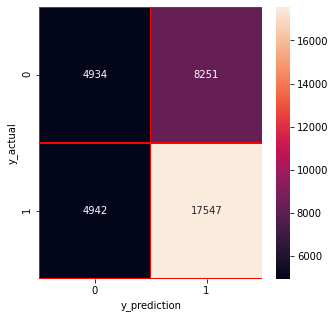

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.5, linecolor="red", fmt =".0f", ax=ax)
plt.xlabel("y_prediction")
plt.ylabel("y_actual")
plt.show()

In [ ]:
prediction = clf.predict(x)
prediction

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df_prediction = pd.DataFrame(prediction, columns=['description_prediction'])
df_prediction.head()

,description_prediction
0,1
1,1
2,1
3,1
4,1


In [ ]:
df_prediction['description_prediction'].value_counts()

1    117640
0     60730
Name: description_prediction, dtype: int64

In [ ]:
# Convert Dataframe to CSV File
df_prediction.to_csv("Description Prediction.csv", index=False)